In [11]:
library(ChIPseeker)
library(org.Hs.eg.db)
library(GenomicRanges)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(clusterProfiler)
library(httpgd)

In [2]:
kapau_peak = readPeakFile("05.genrich/kapau4-6.narrowPeak")
q5u_peak = readPeakFile("05.genrich/Q54-4.narrowPeak")
peak_list = list(kapau_peak=kapau_peak, q5u_peak=q5u_peak)

In [3]:
txdb = TxDb.Hsapiens.UCSC.hg38.knownGene
promoter <- getPromoters(TxDb=txdb, upstream=3000, downstream=3000)
tagMatrix <- lapply(peak_list, getTagMatrix, windows=promoter)

>> preparing start_site regions by gene... 2023-05-17 16时34分31秒
>> preparing tag matrix...  2023-05-17 16时34分31秒 
>> preparing start_site regions by gene... 2023-05-17 16时34分56秒
>> preparing tag matrix...  2023-05-17 16时34分56秒 


>> plotting figure...			 2023-05-17 16时35分13秒 


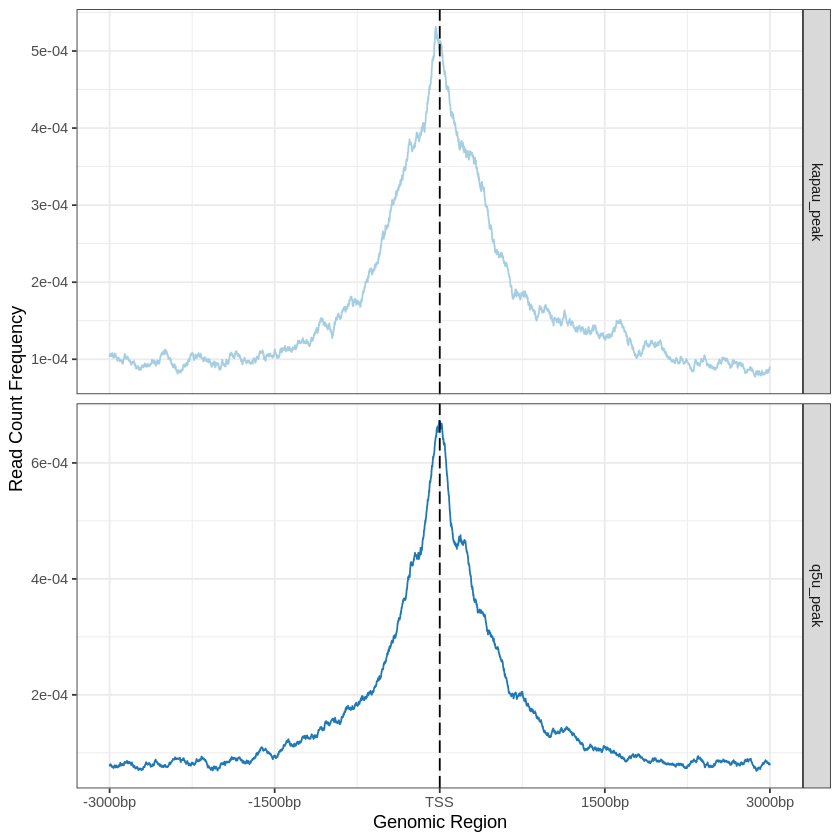

In [4]:
plotAvgProf(tagMatrix, xlim=c(-3000, 3000),
            xlab="Genomic Region",
            ylab = "Read Count Frequency", facet="row")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



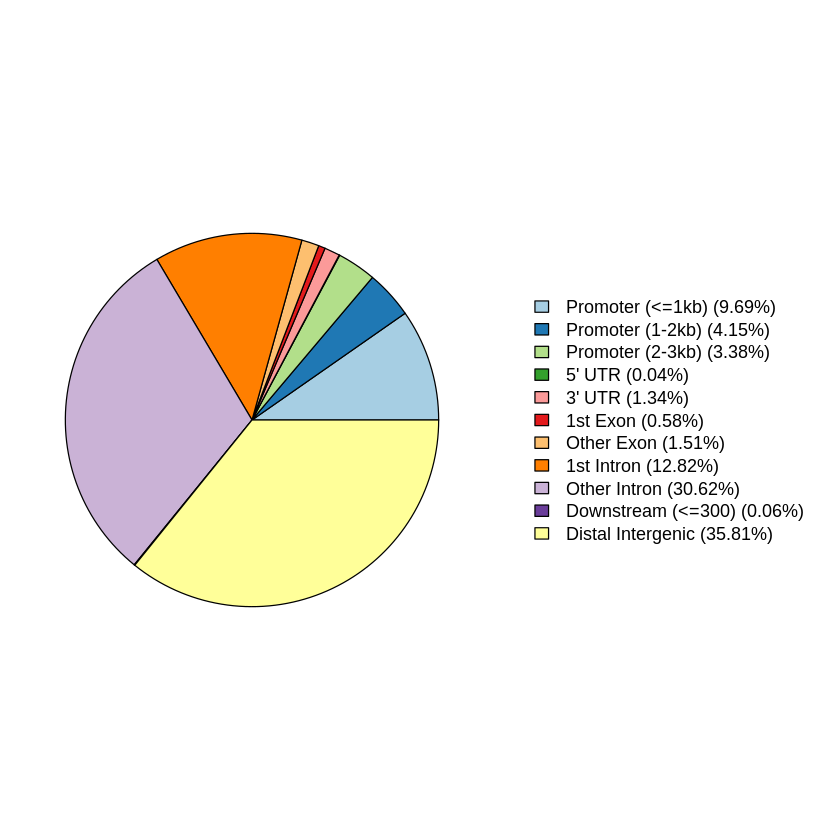

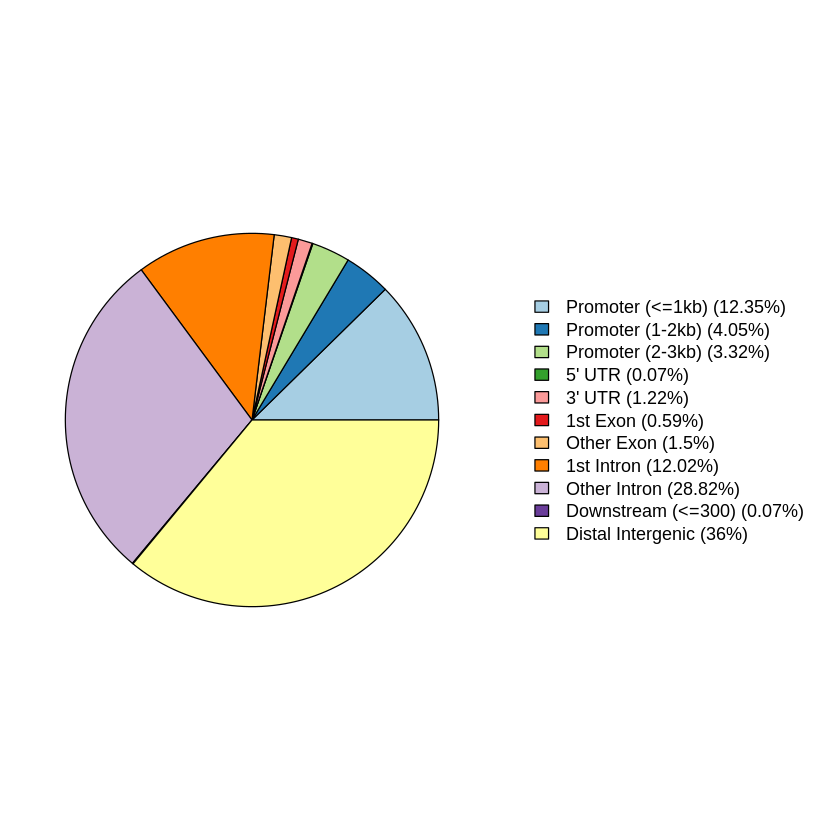

In [5]:
anno_list <- lapply(peak_list, annotatePeak, TxDb=txdb, tssRegion=c(-3000, 3000), verbose=FALSE, annoDb="org.Hs.eg.db")

plotAnnoPie(anno_list[[1]])
plotAnnoPie(anno_list[[2]])

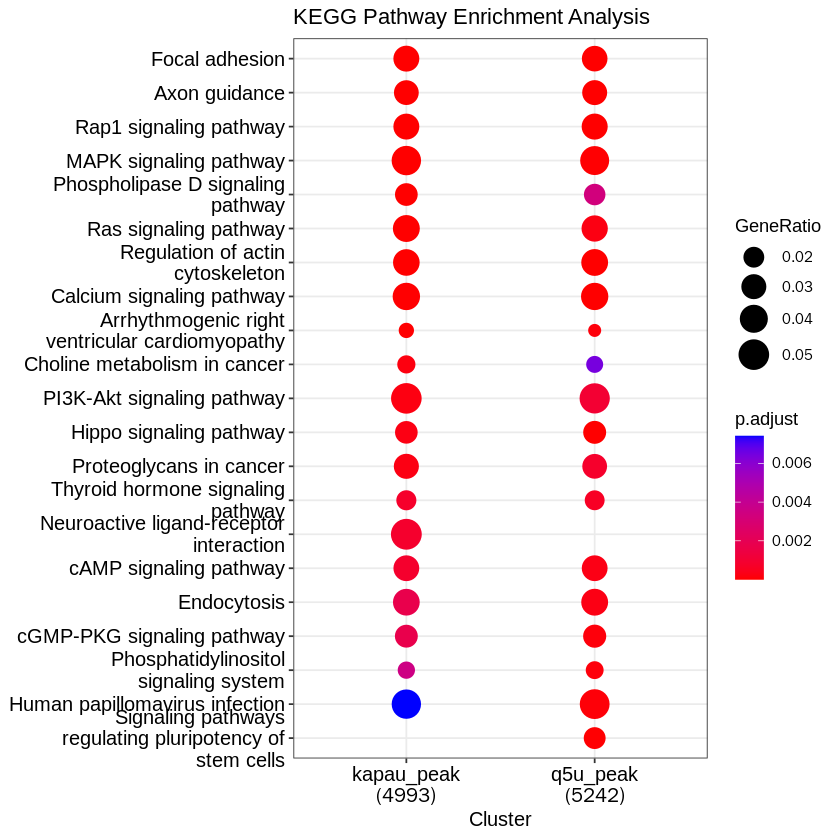

In [6]:
genes = lapply(anno_list, function(i) as.data.frame(i)$geneId)
compKEGG <- compareCluster(geneCluster=genes, fun="enrichKEGG", pvalueCutoff=0.05, pAdjustMethod="BH")
dotplot(compKEGG, showCategory = 15, title="KEGG Pathway Enrichment Analysis")
